In [1]:
# Importing all modules required

import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.mlab as mlab
from scipy.stats import norm
import seaborn as sns
import plotly.express as px
from datetime import datetime


In [2]:
# Load data 
with open('SampleInput.txt') as f:
    file = f.readlines()

In [3]:
#Preprocessing data
columns = ['Year','Day','Hour','Minutes','Seconds','Milliseconds','unknown']
all_rows = []
for line in file:
    if 'DTG' in line:
        line_after_removing_new_line_character = line.replace('\n','')
        columns.append(line_after_removing_new_line_character)
        
    elif len(line.split(" "))>5:
        list_of_values = [value for value in line.split(" ") if value not in ['',0,'\n']]

        #Processing date using first 6 values of row i.e 'Year','Day','Hour','Minutes','Seconds','Milliseconds'
        unprocessed_date_string = str(list_of_values[1]) + " " +  str(list_of_values[0]) + " " +  str(list_of_values[2]) + " " +  str(list_of_values[3]) + " " +  str(list_of_values[4]) + " " +  str(list_of_values[5])
        processed_date_object = datetime.strptime(unprocessed_date_string, "%j %Y %H %M %S %f")
        processed_date_str = processed_date_object.strftime("%Y-%m-%d %H %M %S %f")
        pandas_datetime_object = pd.to_datetime(processed_date_str, format="%Y-%m-%d %H %M %S %f")
        
        list_of_values_after_processing_date = list_of_values[6:]
        total_number_of_parameters = len(list_of_values_after_processing_date)
        
        #Add date as first column
        list_of_values_after_processing_date.insert(0, pandas_datetime_object)
        
        index_of_first_digital_value_in_list = 14
        
        
        # Converting digital values from strings to 1 or 0
        for digital_value_index in range(index_of_first_digital_value_in_list, total_number_of_parameters+1):            
            if list_of_values_after_processing_date[digital_value_index] in ['SYNC','ON','ENA','HIGH','USBL']:
                list_of_values_after_processing_date[digital_value_index] = 1
            else:
                list_of_values_after_processing_date[digital_value_index] = 0
                
        #Convert all values except first column (Date) to float (Decimal)
        for index in range(1, total_number_of_parameters+1):
            list_of_values_after_processing_date[index] = float(list_of_values_after_processing_date[index]) 
        
        all_rows.append(list_of_values_after_processing_date)

# Preprocess column headers
if 'Date' not in columns:
    columns.insert(6,'Date')
if 'Year' in columns:
    columns = columns[6:]

        

In [4]:
#Create the dataframe
df = pd.DataFrame()    
for column_index in range(len(columns)):
    col_data = []
    for i in all_rows:        
        col_data.append(i[column_index])
    df[columns[column_index]] = col_data
    
#Set date as index for dataframe
df.set_index('Date', inplace=True)
original_df = df.copy()

In [5]:
# Display the df (Optional)
display(df)

,unknown,DTG-1_PCH_ANALOG_RAT (Analog),DTG-1_ROL_ANALOG_RAT (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),DTG-1_TH_TEMP (Analog),...,DTG-2_ELECTRONICS_TH (Analog),DTG-2_SYNC_STS (Digital),DTG-2_ON_STS (Digital),DTG-1_ON_STS (Digital),DTG-2_RB_SUPPLY_STS (Digital),DTG-1_SYNC_STS (Digital),DTG-3_USBL_STS (Digital),DTG_ANALOG_RATE_CHK (Digital),DTG-2_TEMP_SEL_CMD_S (Digital),DTG-1_RB_SUPPLY_STS (Digital)
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-15 17:39:55.043,22.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00695,0.00769,38.0,...,52.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:39:55.555,23.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00690,0.00769,38.0,...,52.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:39:57.091,26.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00690,0.00769,38.0,...,52.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:39:58.627,29.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00690,0.00769,38.0,...,52.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:40:02.211,4.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00690,0.00769,38.0,...,52.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-18 12:39:42.526,22.0,-0.0469,-0.0385,0.00577,0.01131,-0.0981,-0.0687,0.00646,0.00799,37.0,...,51.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-05-18 12:39:43.038,23.0,-0.0469,-0.0385,0.00582,0.01131,-0.0981,-0.0687,0.00651,0.00804,37.0,...,51.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-05-18 12:39:44.574,26.0,-0.0469,-0.0385,0.00582,0.01131,-0.0981,-0.0687,0.00651,0.00804,37.0,...,51.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0


In [6]:
# Normalization


# Z score
for column in df:    
    #Only normalize if non digital value
    if df[column].max() != 1 and df[column].min() != 0:
        df[column] = (df[column] - df[column].mean()) / df[column].std() 
        
display(df)

,unknown,DTG-1_PCH_ANALOG_RAT (Analog),DTG-1_ROL_ANALOG_RAT (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),DTG-1_TH_TEMP (Analog),...,DTG-2_ELECTRONICS_TH (Analog),DTG-2_SYNC_STS (Digital),DTG-2_ON_STS (Digital),DTG-1_ON_STS (Digital),DTG-2_RB_SUPPLY_STS (Digital),DTG-1_SYNC_STS (Digital),DTG-3_USBL_STS (Digital),DTG_ANALOG_RATE_CHK (Digital),DTG-2_TEMP_SEL_CMD_S (Digital),DTG-1_RB_SUPPLY_STS (Digital)
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-15 17:39:55.043,0.359001,-0.05086,-0.032154,-0.226192,0.082843,0.795966,-0.003015,0.474685,-0.234133,0.786921,...,0.372670,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:39:55.555,0.495714,-0.05086,-0.032154,-0.226192,0.082843,0.795966,-0.003015,0.405838,-0.234133,0.786921,...,0.372670,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:39:57.091,0.905852,-0.05086,-0.032154,-0.226192,0.082843,0.795966,-0.003015,0.405838,-0.234133,0.786921,...,0.372670,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:39:58.627,1.315991,-0.05086,-0.032154,-0.226192,0.082843,0.795966,-0.003015,0.405838,-0.234133,0.786921,...,0.372670,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:40:02.211,-2.101830,-0.05086,-0.032154,-0.226192,0.082843,0.795966,-0.003015,0.405838,-0.234133,0.786921,...,0.372670,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-18 12:39:42.526,0.359001,-0.05086,-0.032154,0.081688,0.177839,-0.178650,-0.003015,-0.200014,0.084794,0.163648,...,0.100471,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-05-18 12:39:43.038,0.495714,-0.05086,-0.032154,0.125671,0.177839,-0.178650,-0.003015,-0.131167,0.137948,0.163648,...,0.100471,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-05-18 12:39:44.574,0.905852,-0.05086,-0.032154,0.125671,0.177839,-0.178650,-0.003015,-0.131167,0.137948,0.163648,...,0.100471,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0


In [7]:
for column in df.columns:
    #Fill all Nan with 0
    df[column] = df[column].fillna(0)
    
display(df)

,unknown,DTG-1_PCH_ANALOG_RAT (Analog),DTG-1_ROL_ANALOG_RAT (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),DTG-1_TH_TEMP (Analog),...,DTG-2_ELECTRONICS_TH (Analog),DTG-2_SYNC_STS (Digital),DTG-2_ON_STS (Digital),DTG-1_ON_STS (Digital),DTG-2_RB_SUPPLY_STS (Digital),DTG-1_SYNC_STS (Digital),DTG-3_USBL_STS (Digital),DTG_ANALOG_RATE_CHK (Digital),DTG-2_TEMP_SEL_CMD_S (Digital),DTG-1_RB_SUPPLY_STS (Digital)
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-15 17:39:55.043,0.359001,-0.05086,-0.032154,-0.226192,0.082843,0.795966,-0.003015,0.474685,-0.234133,0.786921,...,0.372670,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:39:55.555,0.495714,-0.05086,-0.032154,-0.226192,0.082843,0.795966,-0.003015,0.405838,-0.234133,0.786921,...,0.372670,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:39:57.091,0.905852,-0.05086,-0.032154,-0.226192,0.082843,0.795966,-0.003015,0.405838,-0.234133,0.786921,...,0.372670,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:39:58.627,1.315991,-0.05086,-0.032154,-0.226192,0.082843,0.795966,-0.003015,0.405838,-0.234133,0.786921,...,0.372670,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:40:02.211,-2.101830,-0.05086,-0.032154,-0.226192,0.082843,0.795966,-0.003015,0.405838,-0.234133,0.786921,...,0.372670,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-18 12:39:42.526,0.359001,-0.05086,-0.032154,0.081688,0.177839,-0.178650,-0.003015,-0.200014,0.084794,0.163648,...,0.100471,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-05-18 12:39:43.038,0.495714,-0.05086,-0.032154,0.125671,0.177839,-0.178650,-0.003015,-0.131167,0.137948,0.163648,...,0.100471,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-05-18 12:39:44.574,0.905852,-0.05086,-0.032154,0.125671,0.177839,-0.178650,-0.003015,-0.131167,0.137948,0.163648,...,0.100471,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0


In [8]:
# Principal Component analysis
pca = PCA()
pca.fit_transform(df)
pca.explained_variance_ratio_

array([2.94468012e-01, 2.09181837e-01, 1.60918558e-01, 7.66423120e-02,
       7.60677885e-02, 6.17222544e-02, 4.77664225e-02, 3.60943850e-02,
       1.37326878e-02, 7.78952111e-03, 6.25898246e-03, 5.35340751e-03,
       3.37875879e-03, 3.96847368e-04, 1.18541824e-04, 3.00429818e-05,
       2.34822565e-05, 2.08052461e-05, 1.26208276e-05, 1.04703915e-05,
       6.96427452e-06, 5.29744675e-06])

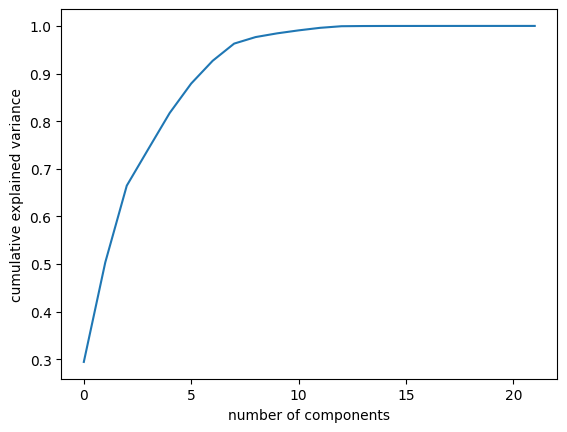

In [9]:
# PCA Plot 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [10]:
# Prinicpal components required to cover 99% of data
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(df) # this will fit and reduce dimensions
print('Number of Prinicpal components required to cover 99% of data: ',pca.n_components_)
display(df)

Number of Prinicpal components required to cover 99% of data:  11


,unknown,DTG-1_PCH_ANALOG_RAT (Analog),DTG-1_ROL_ANALOG_RAT (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),DTG-1_TH_TEMP (Analog),...,DTG-2_ELECTRONICS_TH (Analog),DTG-2_SYNC_STS (Digital),DTG-2_ON_STS (Digital),DTG-1_ON_STS (Digital),DTG-2_RB_SUPPLY_STS (Digital),DTG-1_SYNC_STS (Digital),DTG-3_USBL_STS (Digital),DTG_ANALOG_RATE_CHK (Digital),DTG-2_TEMP_SEL_CMD_S (Digital),DTG-1_RB_SUPPLY_STS (Digital)
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-15 17:39:55.043,0.359001,-0.05086,-0.032154,-0.226192,0.082843,0.795966,-0.003015,0.474685,-0.234133,0.786921,...,0.372670,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:39:55.555,0.495714,-0.05086,-0.032154,-0.226192,0.082843,0.795966,-0.003015,0.405838,-0.234133,0.786921,...,0.372670,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:39:57.091,0.905852,-0.05086,-0.032154,-0.226192,0.082843,0.795966,-0.003015,0.405838,-0.234133,0.786921,...,0.372670,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:39:58.627,1.315991,-0.05086,-0.032154,-0.226192,0.082843,0.795966,-0.003015,0.405838,-0.234133,0.786921,...,0.372670,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:40:02.211,-2.101830,-0.05086,-0.032154,-0.226192,0.082843,0.795966,-0.003015,0.405838,-0.234133,0.786921,...,0.372670,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-18 12:39:42.526,0.359001,-0.05086,-0.032154,0.081688,0.177839,-0.178650,-0.003015,-0.200014,0.084794,0.163648,...,0.100471,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-05-18 12:39:43.038,0.495714,-0.05086,-0.032154,0.125671,0.177839,-0.178650,-0.003015,-0.131167,0.137948,0.163648,...,0.100471,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-05-18 12:39:44.574,0.905852,-0.05086,-0.032154,0.125671,0.177839,-0.178650,-0.003015,-0.131167,0.137948,0.163648,...,0.100471,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0


unknown vs DTG-1_PCH_ANALOG_RAT (Analog)


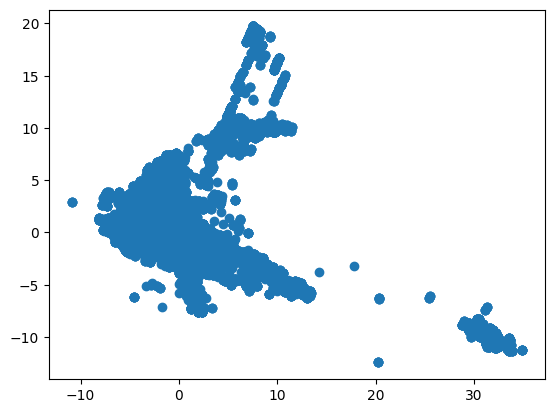

<Figure size 900x700 with 0 Axes>

DTG-1_PCH_ANALOG_RAT (Analog) vs DTG-1_ROL_ANALOG_RAT (Analog)


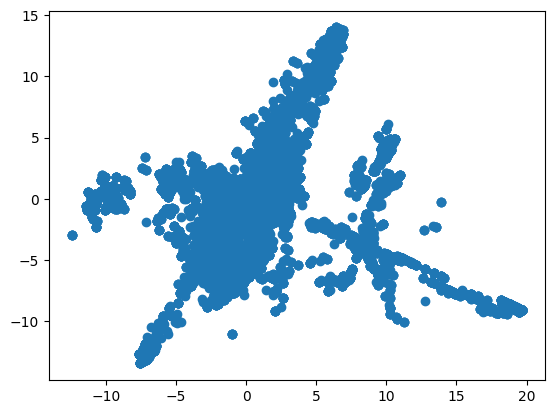

<Figure size 900x700 with 0 Axes>

DTG-1_ROL_ANALOG_RAT (Analog) vs DTG-1_PCH_FINE_RATE  (Analog)


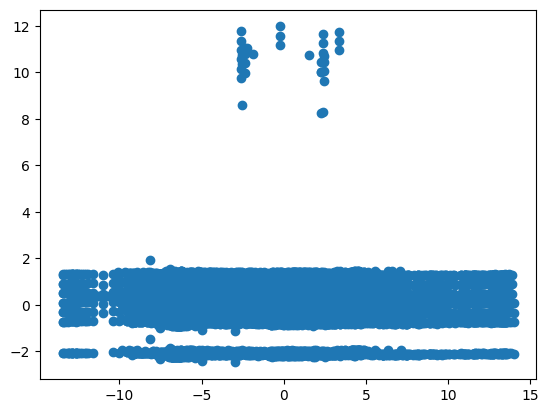

<Figure size 900x700 with 0 Axes>

DTG-1_PCH_FINE_RATE  (Analog) vs DTG-1_ROL_FINE_RATE  (Analog)


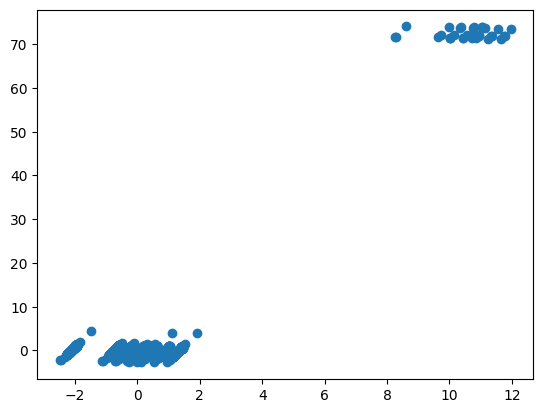

<Figure size 900x700 with 0 Axes>

DTG-1_ROL_FINE_RATE  (Analog) vs DTG-2_YAW_ANALOG_RAT (Analog)


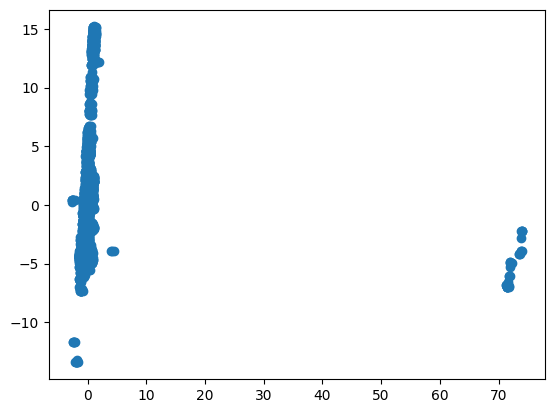

<Figure size 900x700 with 0 Axes>

DTG-2_YAW_ANALOG_RAT (Analog) vs DTG-2_PCH_ANALOG_RAT (Analog)


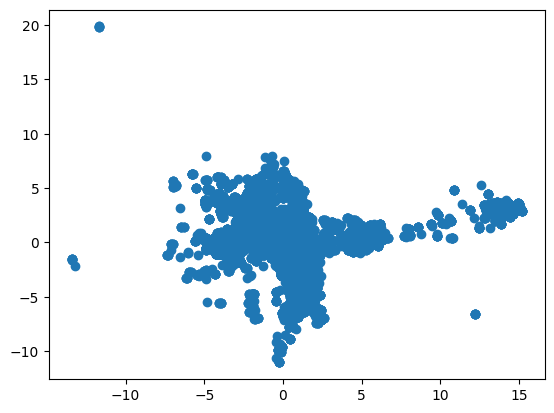

<Figure size 900x700 with 0 Axes>

DTG-2_PCH_ANALOG_RAT (Analog) vs DTG-2_YAW_FINE_RATE  (Analog)


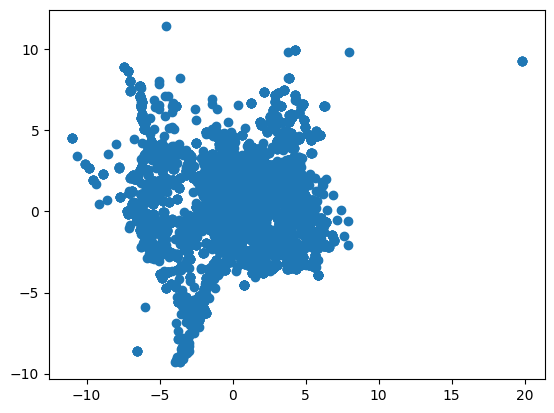

<Figure size 900x700 with 0 Axes>

DTG-2_YAW_FINE_RATE  (Analog) vs DTG-2_PCH_FINE_RATE  (Analog)


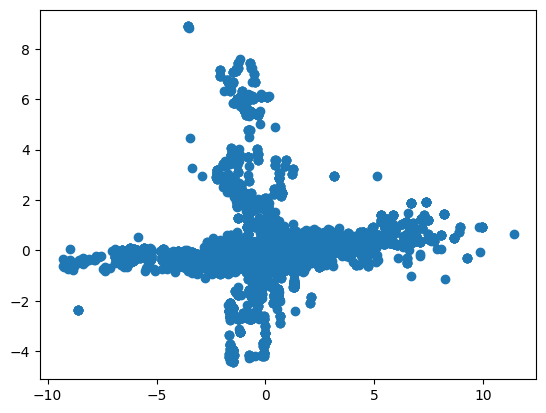

<Figure size 900x700 with 0 Axes>

DTG-2_PCH_FINE_RATE  (Analog) vs DTG-1_TH_TEMP        (Analog)


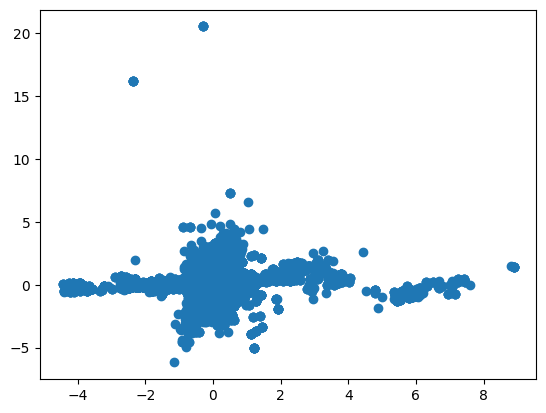

<Figure size 900x700 with 0 Axes>

DTG-1_TH_TEMP        (Analog) vs DTG-1_ELECTRONICS_TH (Analog)


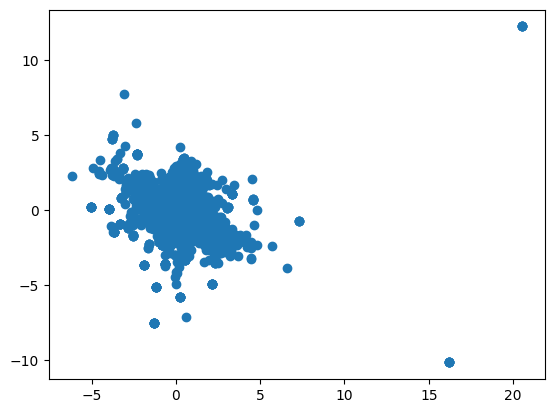

<Figure size 900x700 with 0 Axes>

In [11]:
#Plotting PC1 vs Pc2, PC2 vs PC3 etc..
for i in range(pca.n_components_ -1):
    plot = plt.scatter(X_pca[:,i], X_pca[:,(i+1)])
    print(df.columns[i]+' vs '+ df.columns[i+1])
    plt.figure(figsize=(9, 7))
    plt.show()

In [13]:
#Dataframe with PCA Values
pd.DataFrame(pca.components_, columns = df.columns)

,unknown,DTG-1_PCH_ANALOG_RAT (Analog),DTG-1_ROL_ANALOG_RAT (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),DTG-1_TH_TEMP (Analog),...,DTG-2_ELECTRONICS_TH (Analog),DTG-2_SYNC_STS (Digital),DTG-2_ON_STS (Digital),DTG-1_ON_STS (Digital),DTG-2_RB_SUPPLY_STS (Digital),DTG-1_SYNC_STS (Digital),DTG-3_USBL_STS (Digital),DTG_ANALOG_RATE_CHK (Digital),DTG-2_TEMP_SEL_CMD_S (Digital),DTG-1_RB_SUPPLY_STS (Digital)
0,0.000097,0.289754,0.390281,0.310981,0.244126,0.378235,0.404817,0.278049,0.292765,-0.246090,...,-0.197859,-0.016895,-0.016633,-0.007240,-0.016359,-7.561568e-03,-0.000008,0.000032,-0.000009,-0.007203
1,0.000173,0.132906,-0.257902,0.118144,-0.244753,-0.264370,-0.133594,-0.267516,0.036211,-0.457093,...,-0.491174,-0.046236,-0.045379,-0.021339,-0.044410,-2.212040e-02,-0.000008,-0.000115,-0.000009,-0.021041
2,-0.000226,0.235932,-0.216167,0.484329,-0.351734,-0.139732,0.227624,-0.282425,0.473293,0.244548,...,0.185605,0.013090,0.012574,0.013133,0.011987,1.350783e-02,0.000011,0.000062,0.000019,0.012792
3,0.989649,0.008660,0.003649,0.005975,0.012273,-0.008203,-0.005565,-0.004142,-0.002609,-0.002005,...,-0.004759,-0.000413,-0.000375,0.000077,-0.000425,-9.227489e-07,-0.000007,0.000015,-0.000003,0.000023
4,-0.143467,0.070267,0.019170,0.040324,0.073728,-0.045833,-0.041911,-0.019942,-0.026116,-0.013729,...,-0.034703,-0.003475,-0.003063,0.000376,-0.003439,-7.788753e-05,0.000005,0.000067,-0.000004,0.000018
5,0.001154,0.725459,0.010584,0.165486,0.242379,-0.180114,-0.369495,0.121713,-0.301331,0.162954,...,-0.136097,-0.031769,-0.032575,0.015356,-0.033239,1.610146e-02,-0.000014,0.000278,0.000004,0.015140
6,0.003039,0.243138,-0.225864,-0.153776,-0.662802,0.458824,0.114039,0.328613,-0.290266,-0.025977,...,-0.040755,-0.008532,-0.008572,0.000993,-0.008800,1.013728e-03,-0.000128,-0.000027,-0.000008,0.000940
7,-0.000303,0.256640,0.344902,-0.234027,-0.038558,0.140283,0.315245,-0.726120,-0.325598,-0.028648,...,0.069751,0.011404,0.011158,0.005142,0.010667,5.534128e-03,0.000157,0.000102,-0.000013,0.005255
8,-0.000306,-0.203961,0.167641,-0.147475,-0.081672,-0.025823,0.076082,-0.038411,0.125557,0.151564,...,-0.724739,-0.131946,-0.133568,0.017572,-0.135791,2.027790e-02,-0.000078,-0.001540,0.000089,0.016188
9,0.000513,-0.154295,-0.029643,0.295993,0.057965,0.666135,-0.567465,-0.325297,0.071167,0.058130,...,-0.060619,-0.013033,-0.013330,-0.004964,-0.013604,-4.698109e-03,0.000134,0.000358,-0.000139,-0.005032


In [14]:
# df after reducing dimension
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns

# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
most_important_names = [*set(most_important_names)]
df = df[most_important_names]
display(df)

,DTG-2_TH_TEMP (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),unknown,DTG-1_ROL_ANALOG_RAT (Analog),DTG-1_PCH_ANALOG_RAT (Analog),DTG-2_ELECTRONICS_TH (Analog),DTG-2_YAW_ANALOG_RAT (Analog)
Date,,,,,,,,,,
2018-04-15 17:39:55.043,0.096477,0.474685,-0.003015,-0.226192,0.082843,0.359001,-0.032154,-0.05086,0.372670,0.795966
2018-04-15 17:39:55.555,0.096477,0.405838,-0.003015,-0.226192,0.082843,0.495714,-0.032154,-0.05086,0.372670,0.795966
2018-04-15 17:39:57.091,0.096477,0.405838,-0.003015,-0.226192,0.082843,0.905852,-0.032154,-0.05086,0.372670,0.795966
2018-04-15 17:39:58.627,0.096477,0.405838,-0.003015,-0.226192,0.082843,1.315991,-0.032154,-0.05086,0.372670,0.795966
2018-04-15 17:40:02.211,0.096477,0.405838,-0.003015,-0.226192,0.082843,-2.101830,-0.032154,-0.05086,0.372670,0.795966
...,...,...,...,...,...,...,...,...,...,...
2018-05-18 12:39:42.526,-0.055517,-0.200014,-0.003015,0.081688,0.177839,0.359001,-0.032154,-0.05086,0.100471,-0.178650
2018-05-18 12:39:43.038,-0.055517,-0.131167,-0.003015,0.125671,0.177839,0.495714,-0.032154,-0.05086,0.100471,-0.178650
2018-05-18 12:39:44.574,-0.055517,-0.131167,-0.003015,0.125671,0.177839,0.905852,-0.032154,-0.05086,0.100471,-0.178650


In [15]:

df_510 = original_df.loc[pd.to_datetime('2018-05-10'):pd.to_datetime('2018-05-11')]
df_510 = df_510[most_important_names]

for column in df_510.columns:
    df_510[column] = df_510[column].replace(np.nan, 0)
    
display(df_510)


,DTG-2_TH_TEMP (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),unknown,DTG-1_ROL_ANALOG_RAT (Analog),DTG-1_PCH_ANALOG_RAT (Analog),DTG-2_ELECTRONICS_TH (Analog),DTG-2_YAW_ANALOG_RAT (Analog)
Date,,,,,,,,,,
2018-05-10 00:00:02.198,38.0,0.00666,-0.0687,0.00582,0.01131,14.0,-0.0385,-0.0469,51.0,-0.0981
2018-05-10 00:00:03.734,38.0,0.00666,-0.0687,0.00582,0.01131,17.0,-0.0385,-0.0469,51.0,-0.0981
2018-05-10 00:00:05.270,38.0,0.00666,-0.0687,0.00582,0.01131,20.0,-0.0385,-0.0469,51.0,-0.0981
2018-05-10 00:00:06.294,38.0,0.00666,-0.0687,0.00582,0.01131,22.0,-0.0385,-0.0469,51.0,-0.0981
2018-05-10 00:00:06.806,38.0,0.00666,-0.0687,0.00582,0.01131,23.0,-0.0385,-0.0469,51.0,-0.0981
...,...,...,...,...,...,...,...,...,...,...
2018-05-10 23:58:20.171,35.0,0.00617,-0.0687,0.00531,0.01106,20.0,-0.0385,-0.0469,49.0,-0.0981
2018-05-10 23:58:21.195,35.0,0.00617,-0.0687,0.00531,0.01106,22.0,-0.0385,-0.0469,49.0,-0.0981
2018-05-10 23:58:21.707,35.0,0.00617,-0.0687,0.00526,0.01111,23.0,-0.0385,-0.0469,49.0,-0.0981


C:\Users\reach\AppData\Local\Temp\ipykernel_21316\1424075061.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ano = pd.Series()


First anomaly detected at 2018-05-10 11:00:00


[<AxesSubplot: >]

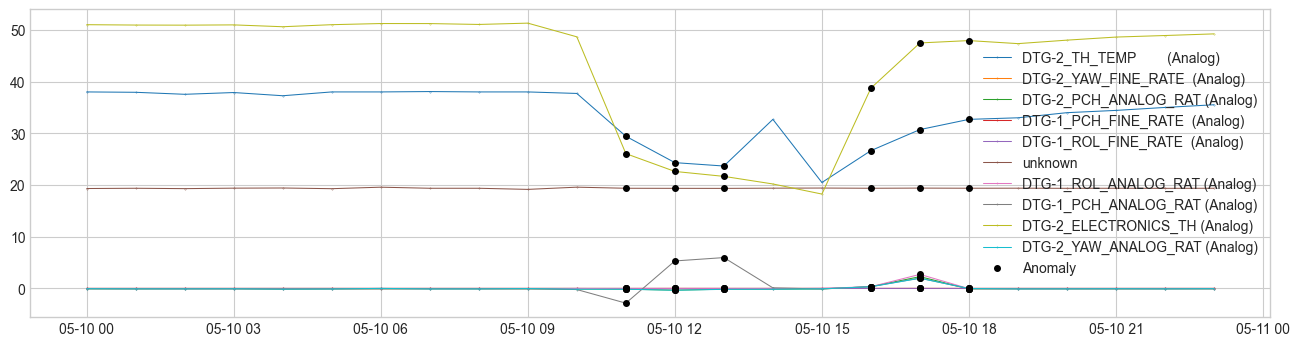

In [16]:

from adtk.detector import AutoregressionAD
from adtk.visualization import plot
from adtk.detector import CustomizedDetectorHD

df_510_r = df_510
df_510_r = df_510.resample('H').mean()
df_510_r.fillna(0)
def myDetectionFunc1(df):
    ano = pd.Series()
    for column in df.columns[1:]:
        ar = AutoregressionAD(c=3.0).fit_detect(df[column]).fillna(0).replace(0.0, False).replace(1.0, True)
        ano = ano | ar
    return ano

customized_detector = CustomizedDetectorHD(detect_func=myDetectionFunc1)
anomalies1 = customized_detector.detect(df_510_r)
print('First anomaly detected at',anomalies1[anomalies1].index[0])
plot(df_510_r,legend=True, anomaly=anomalies1, ts_linewidth=-.75, ts_markersize=0.5, anomaly_marker='o',anomaly_tag="marker", anomaly_color='black', curve_group='all')

